In [1]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/75/7a/cad3b21a91cc55abe06f70146b564f20d9db2aee9631fdee580283bd5e1e/wordcloud-1.9.3-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 300.0/300.0 kB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json

# Read the dataset

In [118]:
df = pd.read_csv("F:\Youtube-analysis\IN_youtube_trending_data.csv\IN_youtube_trending_data.csv")
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [119]:
df.shape

(233788, 16)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233788 entries, 0 to 233787
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           233788 non-null  object
 1   title              233788 non-null  object
 2   publishedAt        233788 non-null  object
 3   channelId          233788 non-null  object
 4   channelTitle       233787 non-null  object
 5   categoryId         233788 non-null  int64 
 6   trending_date      233788 non-null  object
 7   tags               233788 non-null  object
 8   view_count         233788 non-null  int64 
 9   likes              233788 non-null  int64 
 10  dislikes           233788 non-null  int64 
 11  comment_count      233788 non-null  int64 
 12  thumbnail_link     233788 non-null  object
 13  comments_disabled  233788 non-null  bool  
 14  ratings_disabled   233788 non-null  bool  
 15  description        214969 non-null  object
dtypes: bool(2), int64(5)

# Data Cleaning

In [121]:
df[df["description"].isna()].head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
74,fC3G-P3QINo,DISAPPOINTED | NEED YOUR SUPPORT |,2020-08-11T09:34:58Z,UC2kBDwkqiy7zgH1-M4UtUXQ,Dipika Ki Duniya,22,2020-08-12T00:00:00Z,[None],794840,53933,901,2477,https://i.ytimg.com/vi/fC3G-P3QINo/default.jpg,False,False,NaN
211,DY7auMfX1YU,LIVE: Janmastami - Dwarka: Vhalo Maro Aaavshe ...,2020-08-12T19:30:27Z,UCneBFse451PgKgXJTDqikYA,Doordarshan Girnar,1,2020-08-13T00:00:00Z,DD Girnar|DD|Gujarati|giranar|news,59327,1151,53,28,https://i.ytimg.com/vi/DY7auMfX1YU/default.jpg,False,False,NaN
308,fC3G-P3QINo,DISAPPOINTED | NEED YOUR SUPPORT |,2020-08-11T09:34:58Z,UC2kBDwkqiy7zgH1-M4UtUXQ,Dipika Ki Duniya,22,2020-08-13T00:00:00Z,[None],898632,57324,1030,2612,https://i.ytimg.com/vi/fC3G-P3QINo/default.jpg,False,False,NaN
423,l9idDZKBasY,അബുദാബിയിൽ ഇനി കുറച് ദിവസങ്ങൾ മാത്രം || Our f...,2020-08-13T09:04:45Z,UCC0Vj5xPfTUiBT1O80Hf4rg,Majida Shafeer -MyChaptersOfHappiness,26,2020-08-14T00:00:00Z,[None],107142,3476,157,847,https://i.ytimg.com/vi/l9idDZKBasY/default.jpg,False,False,NaN
424,DY7auMfX1YU,LIVE: Janmastami - Dwarka: Vhalo Maro Aaavshe ...,2020-08-12T19:30:27Z,UCneBFse451PgKgXJTDqikYA,Doordarshan Girnar,1,2020-08-14T00:00:00Z,DD Girnar|DD|Gujarati|giranar|news,63767,1192,57,32,https://i.ytimg.com/vi/DY7auMfX1YU/default.jpg,False,False,NaN


In [122]:
df["description"] = df["description"].fillna("")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233788 entries, 0 to 233787
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           233788 non-null  object
 1   title              233788 non-null  object
 2   publishedAt        233788 non-null  object
 3   channelId          233788 non-null  object
 4   channelTitle       233787 non-null  object
 5   categoryId         233788 non-null  int64 
 6   trending_date      233788 non-null  object
 7   tags               233788 non-null  object
 8   view_count         233788 non-null  int64 
 9   likes              233788 non-null  int64 
 10  dislikes           233788 non-null  int64 
 11  comment_count      233788 non-null  int64 
 12  thumbnail_link     233788 non-null  object
 13  comments_disabled  233788 non-null  bool  
 14  ratings_disabled   233788 non-null  bool  
 15  description        233788 non-null  object
dtypes: bool(2), int64(5)

## Transforming the dates columns

In [123]:
df["trending_date"] = df["trending_date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


   trending_date  record_count
0           2020         26121
1           2021         70439
2           2022         71056
3           2023         65382
4           2024           790


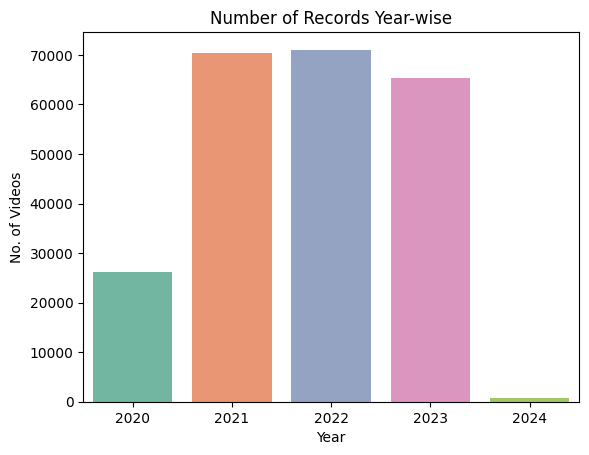

In [124]:
year = []

#extracting the year
year = df["trending_date"].dt.year

#getting number of videos per year
year_count = df.groupby(year).size().reset_index(name='record_count')
print(year_count)

#plotting no. of videos vs year
sns.barplot(x="trending_date", y="record_count", data = year_count, palette = sns.color_palette("Set2"))
plt.xlabel('Year')
plt.ylabel('No. of Videos')
plt.title('Number of Records Year-wise')
plt.show()

In [125]:
df.describe()

,categoryId,trending_date,view_count,likes,dislikes,comment_count
count,233788.000000,233788,2.337880e+05,2.337880e+05,2.337880e+05,2.337880e+05
mean,20.844244,2022-04-16 22:02:46.058138112,2.858062e+06,1.440147e+05,2.507791e+03,8.587211e+03
min,1.000000,2020-08-12 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,2021-06-17 00:00:00,3.917752e+05,1.284700e+04,0.000000e+00,3.560000e+02
50%,24.000000,2022-04-14 00:00:00,9.765200e+05,3.895750e+04,0.000000e+00,1.165000e+03
75%,24.000000,2023-02-11 00:00:00,2.487578e+06,1.207922e+05,8.612500e+02,4.098000e+03
max,29.000000,2024-01-05 00:00:00,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06
std,6.048848,NaN,7.072512e+06,4.039821e+05,7.464079e+04,7.271503e+04


## Distribution of Views

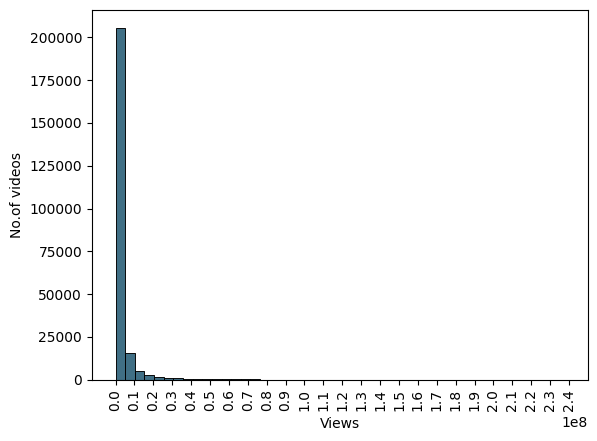

In [57]:
#views histogram
fig, ax = plt.subplots()
_ = sns.histplot(df['view_count'], kde = False, color="#003f5c", bins=np.linspace(0, 2.5e8,50))
_ = ax.set(xlabel = "Views", ylabel = "No.of videos", xticks = np.arange(0, 2.5e8, 1e7))
_ = ax.set_xlim(right = 2.5e8)
_ = plt.xticks(rotation = 90)

* From the above plot we see that maximum view count ranges less than  ```10 million```. So in the following plot, distribution of view count is focussed till ```30 million```.

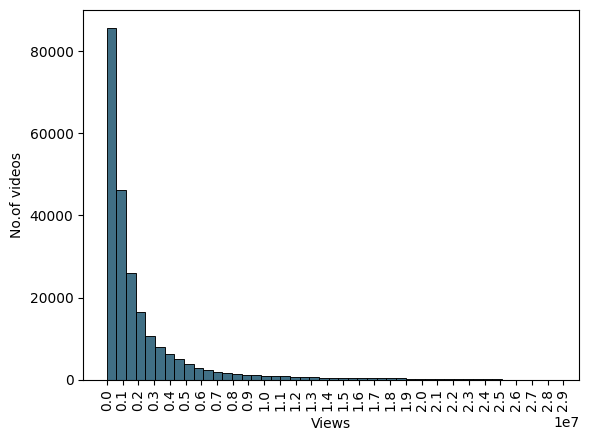

In [66]:
fig, ax = plt.subplots()
_ = sns.histplot(df[df['view_count'] < 25e6]['view_count'], kde = False, color="#003f5c", bins=np.linspace(0, 3e7,50))
_ = ax.set(xlabel = "Views", ylabel = "No.of videos",xticks = np.arange(0, 3e7, 1e6))
_ = ax.set_xlim(right = 3e7)
_ = plt.xticks(rotation = 90)

* We can see a majority of trending videos have less than 5 million views : Let's look at the percentage

In [85]:
df[df['view_count'] < 0.5e7]['view_count'].count()/df['view_count'].count() * 100

87.72648724485431

In [86]:
df[df['view_count'] < 1e7]['view_count'].count()/df['view_count'].count() * 100

94.40903724742074

In [87]:
df[df['view_count'] < 3e7]['view_count'].count()/df['view_count'].count() * 100

98.80917754546854

* It's 88%. So, no. of videos with < 10 million views constitute about 94%, < 30 million views constitute about 98.8%.

## Likes distribution

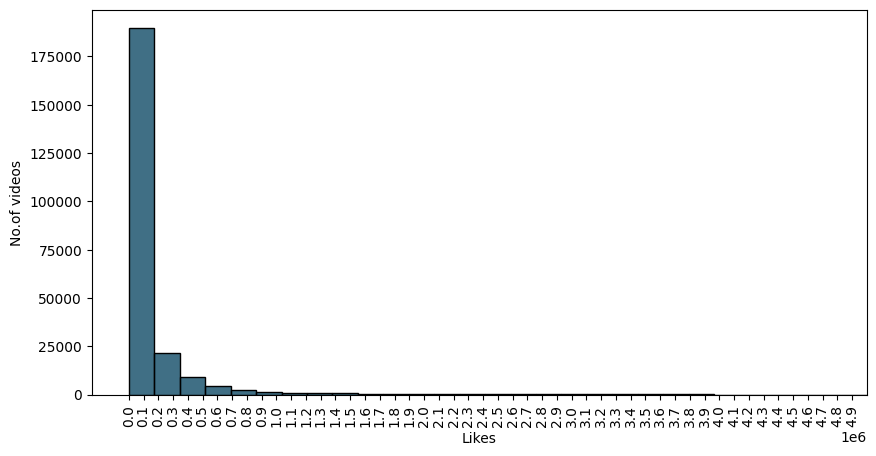

In [78]:
#likes histogram
fig, ax = plt.subplots(figsize = (10,5))
_ = sns.histplot(df['likes'], kde = False, color="#003f5c", bins=np.linspace(0, 5e6,30))
_ = ax.set(xlabel = "Likes", ylabel = "No.of videos", xticks = np.arange(0, 5e6, 1e5))
_ = ax.set_xlim(right = 5e6)
_ = plt.xticks(rotation = 90)

* We can see that likes have varied till ```1 million```. Let's focus on on the likes count over a range of ```0 - 2 million```.

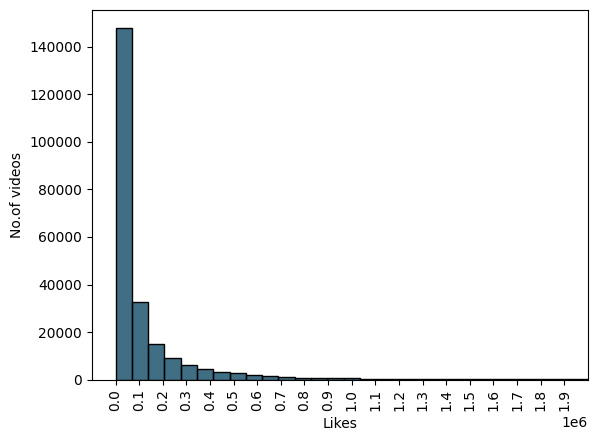

In [80]:
#likes histogram
fig, ax = plt.subplots()
_ = sns.histplot(df[df['likes'] < 2e6]['likes'], kde = False, color="#003f5c", bins=np.linspace(0, 2e6,30))
_ = ax.set(xlabel = "Likes", ylabel = "No.of videos", xticks = np.arange(0, 2e6, 1e5))
_ = ax.set_xlim(right = 2e6)
_ = plt.xticks(rotation = 90)

* We can see a majority of trending videos have less than ```150,000 likes``` : Let's look at the percentage

In [89]:
df[df['likes'] < 1.5e5]['likes'].count()/df['likes'].count() * 100

78.83338751347374

In [91]:
df[df['likes'] < 3e5]['likes'].count()/df['likes'].count() * 100

88.7718787961743

In [90]:
df[df['likes'] < 5e5]['likes'].count()/df['likes'].count() * 100

94.11090389583725

* Videos with ```150,000 likes``` constitute about ```79%```. Consequently, ```89%``` videos have less than ```300,000 likes```, and ```94%``` have less than ```500,000 likes```.

## Comments Distribution

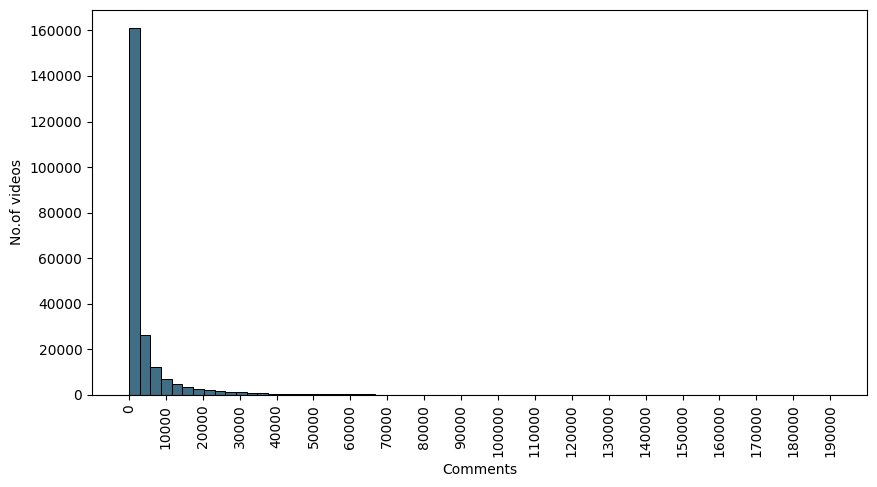

In [96]:
#comments histogram
fig, ax = plt.subplots(figsize = (10,5))
_ = sns.histplot(df['comment_count'], kde = False, color="#003f5c", bins=np.linspace(0, 2e5,70))
_ = ax.set(xlabel = "Comments", ylabel = "No.of videos", xticks = np.arange(0, 2e5, 1e4))
_ = ax.set_xlim(right = 2e5)
_ = plt.xticks(rotation = 90)

* From the graph we see most trending videos have less than ```5000``` comments. Let's see the percentage

In [97]:
df[df['comment_count'] < 5e3]['comment_count'].count()/df['comment_count'].count() * 100

78.03651171146508

In [98]:
df[df['comment_count'] < 10e3]['comment_count'].count()/df['comment_count'].count() * 100

86.84064194911629

In [126]:
df[df['comment_count'] < 20e3]['comment_count'].count()/df['comment_count'].count() * 100

92.92521429671326

* About ```78%``` of trending videos have less than ```5000 comments``` in the videos, ```86%``` have less than ```10,000 comments``` and ```93%``` have ```20,000 comments```. 

## Analysis of non-numeric columns

In [101]:
df.describe(include = ['O'])

,video_id,title,publishedAt,channelId,channelTitle,tags,thumbnail_link,description
count,233788,233788,233788,233788,233787,233788,233788,233788
unique,72895,73924,72243,4428,4679,46136,72897,61867
top,y_RHQ4mBDKA,Kundali Bhagya,2021-06-04T18:15:01Z,UCvrhwpnp2DHYQ1CbXby9ypQ,Vijay Television,[None],https://i.ytimg.com/vi/y_RHQ4mBDKA/default.jpg,
freq,19,55,20,3098,3098,41665,19,18819


* Although there are ```233788``` videos, the unique video count is only ```72895```. This means some videos had been trending for more than one day.

* This table tells us that the top frequent title is ```Kundali Bhagya``` and it had been on the trending list for ```55``` times.

## Title Length

In [127]:
df['title_length'] = df['title'].apply(lambda x : len(x))
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,title_length
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,92
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,97
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,55
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,98
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,100


## Title Length Distribution

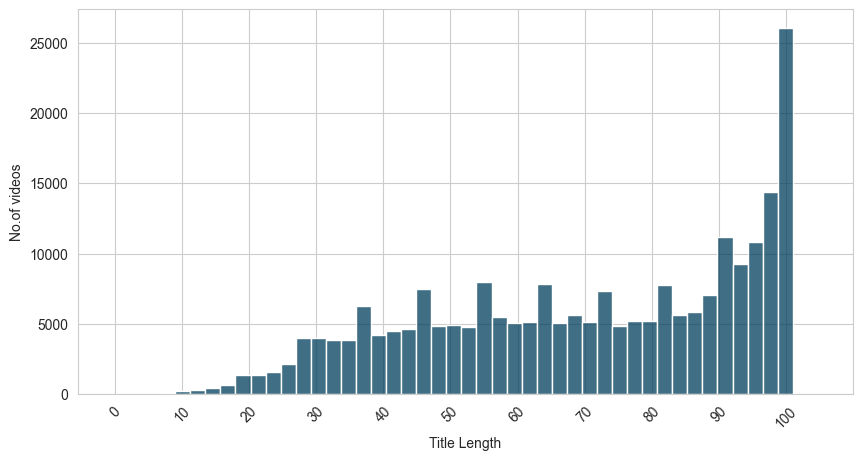

In [152]:
fig, ax = plt.subplots(figsize = (10,5))
_ = sns.histplot(df['title_length'], kde = False, color="#003f5c", ax=ax, bins=np.linspace(0, 110,50))
_ = ax.set(xlabel = "Title Length", ylabel = "No.of videos", xticks = np.arange(0, 110, 10))
_ = ax.set_xlim(right = 110)
_ = plt.xticks(rotation = 45)

* More than ```10,000``` trending videos have title length between ```90 - 100``` characters.

## Variation of Video title length with views

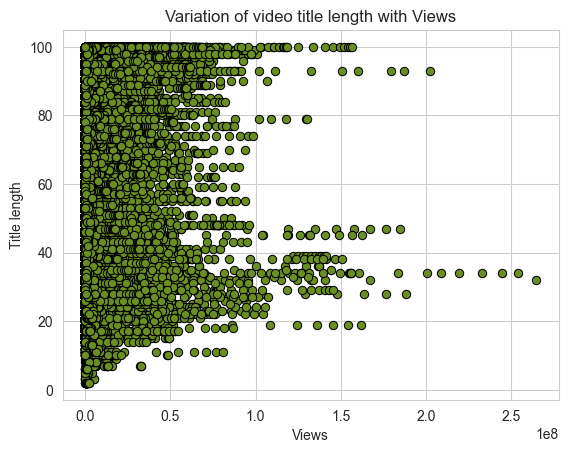

In [166]:
plt.scatter(x = 'view_count', y = 'title_length', data = df, color = 'olivedrab', linewidth = 0.75, edgecolors = 'black', marker = 'o')
plt.title("Variation of video title length with Views")
plt.xlabel("Views")
plt.ylabel("Title length")
plt.show()

* From this scatterplot, we can say there is no relationship between video title length and views. However, we see an interesting thing : views have increased for videos with title length ```30 - 50``` and ```80 - 100``` characters.

## Correlation between the dataset variables

In [134]:
numeric_columns = df.select_dtypes(include=['int', 'bool'])
numeric_columns.corr()

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,title_length
categoryId,1.000000,-0.128698,-0.093446,-0.009381,-0.098170,0.033566,0.020405,-0.191633
view_count,-0.128698,1.000000,0.801630,0.112909,0.463035,0.014169,0.015520,-0.004432
likes,-0.093446,0.801630,1.000000,0.069689,0.620666,-0.002865,-0.034353,-0.115687
dislikes,-0.009381,0.112909,0.069689,1.000000,0.151304,0.000396,-0.003238,0.004536
comment_count,-0.098170,0.463035,0.620666,0.151304,1.000000,-0.009984,-0.006632,-0.041728
comments_disabled,0.033566,0.014169,-0.002865,0.000396,-0.009984,1.000000,0.032950,-0.027751
ratings_disabled,0.020405,0.015520,-0.034353,-0.003238,-0.006632,0.032950,1.000000,0.007692
title_length,-0.191633,-0.004432,-0.115687,0.004536,-0.041728,-0.027751,0.007692,1.000000


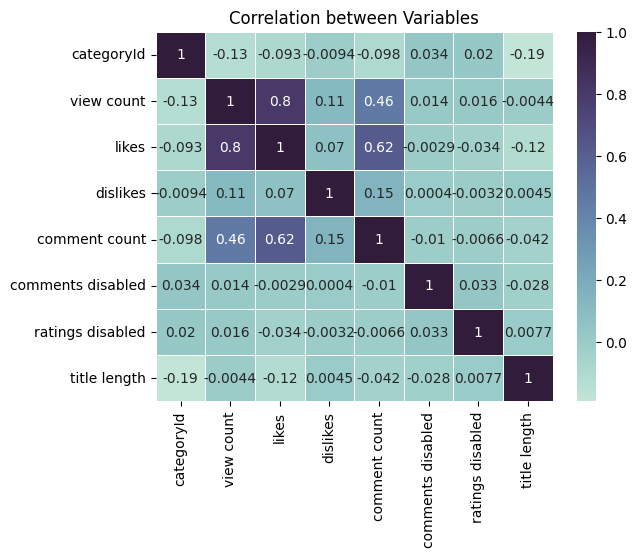

In [144]:
labels = [x.replace('_', ' ') for x in 
          list(numeric_columns.columns.values)]

sns.heatmap(numeric_columns.corr(), annot = True, xticklabels = labels, yticklabels = labels, cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), linewidths = 0.5)
plt.title("Correlation between Variables")
plt.show()

* From this heatmap, we can see that there is high positive correlation between 
    1. view count and likes
    2. likes and comment count

## Variation of view count with likes

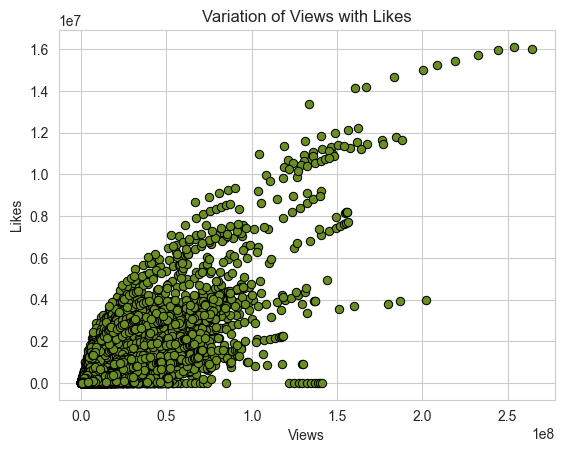

In [167]:
plt.scatter(x = 'view_count', y = 'likes', data = df, color = 'olivedrab', linewidth = 0.75, edgecolors = 'black', marker = 'o')
plt.title("Variation of Views with Likes")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()

* This plot between likes and view count shows that they have positive correlation, that means, increase of views increases the number of likes mostly.

## Variation of Comment count with likes

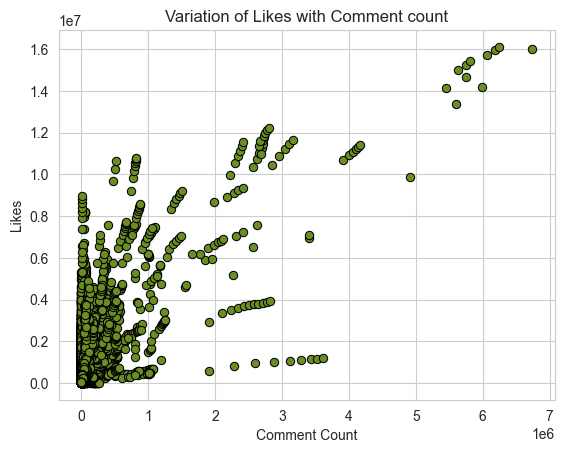

In [168]:
plt.scatter(x = 'comment_count', y = 'likes', data = df, color = 'olivedrab', linewidth = 0.75, edgecolors = 'black', marker = 'o')
plt.title("Variation of Likes with Comment count")
plt.xlabel("Comment Count")
plt.ylabel("Likes")
plt.show()

* This plot also shows a positive correlation trend for likes and comment count.

## Channels with most trending videos

In [178]:
channels = df['channelTitle'].value_counts().reset_index(name = 'Video_count')
channels.sort_values(by = 'Video_count', ascending = False, inplace = True)
channels.head(10)

,channelTitle,Video_count
0,Vijay Television,3098
1,Sourav Joshi Vlogs,2548
2,Sony SAB,2218
3,Sun TV,1789
4,Colors TV,1511
5,HAR PAL GEO,1471
6,Crazy XYZ,1360
7,Asianet,1324
8,ZEE5,1138
9,ARY Digital HD,1136


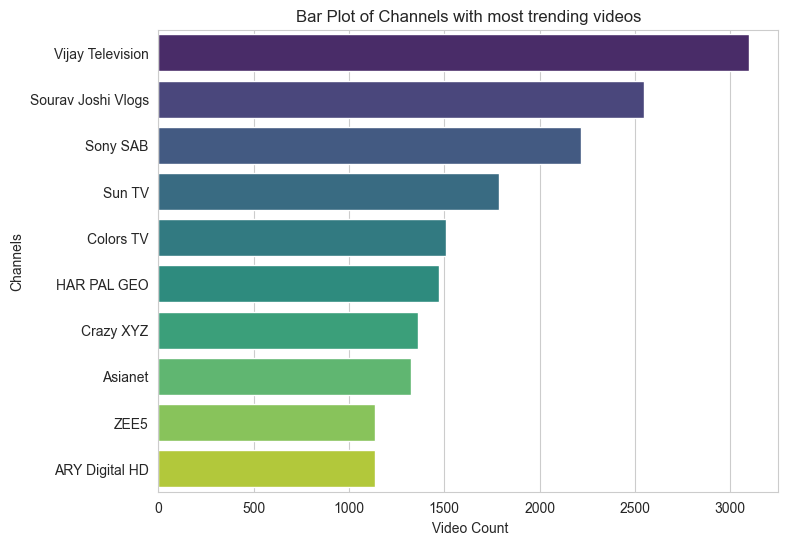

In [223]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Video_count', y='channelTitle', data=channels.head(10), palette='viridis', orient='h')
plt.xlabel(' Video Count')
plt.ylabel('Channels')
plt.title('Bar Plot of Channels with most trending videos')
plt.show()

## Most trending Category of videos

In [199]:
#category name from json file

with open ("IN_category_id.json") as json_file:
    categories = json.load(json_file)["items"]

cat_record = {}
for cat in categories:
    cat_record[int(cat["id"])] = cat["snippet"]["title"]

df["category_name"] = df["categoryId"].map(cat_record)
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,title_length,category_name
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,92,Entertainment
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,97,Music
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,55,Music
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,98,Music
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,100,Music


In [226]:
trending_cat = df["category_name"].value_counts().reset_index(name = "count")
trending_cat

,category_name,count
0,Entertainment,90841
1,People & Blogs,38085
2,Music,30822
3,Comedy,17223
4,Gaming,13577
5,Howto & Style,7541
6,Science & Technology,7101
7,News & Politics,7026
8,Sports,6811
9,Film & Animation,5976


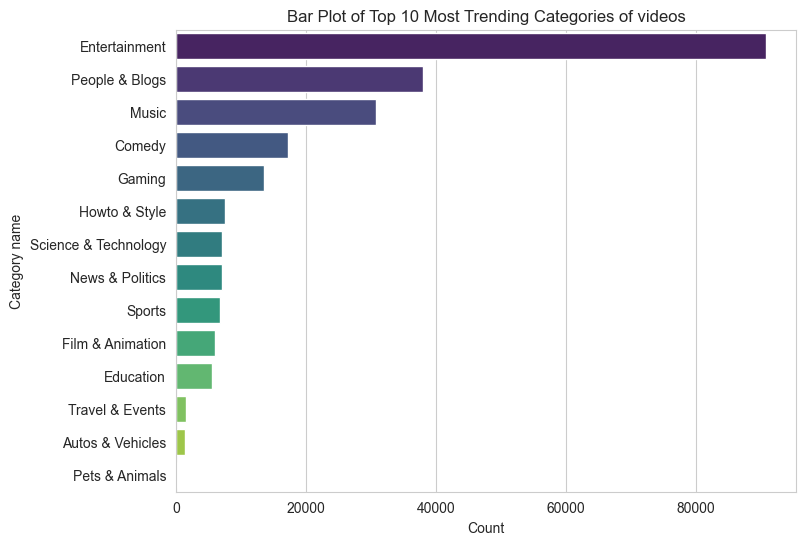

In [225]:
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='category_name', data = trending_cat, palette='viridis', orient='h')
plt.xlabel('Count')
plt.ylabel('Category name')
plt.title('Bar Plot of Top 10 Most Trending Categories of videos')
plt.show()

## Popular day and time of publishing videos

* A sample value of publishedAt column is ```2020-08-12T04:31:41Z```. This means, the publishing date of this video is ```2020-08-12``` and the publishing time is ```04:31:41``` in Coordinated Universal Time (UTC) time zone (+5:30 IST).

* We are adding two additional columns : ```publishing day``` - on which day of the week the video was published and ```publishing hour``` - at which time the video was published

In [205]:
df["publishing_day"] = df["publishedAt"].apply(lambda x : datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publishedAt"].apply(lambda x : x[11:13])
df.drop(labels = "publishedAt", axis = 1, inplace = True)
df.head()

,video_id,title,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,title_length,category_name,publishing_day,publishing_hour
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,92,Entertainment,Wed,04
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,97,Music,Tue,09
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,55,Music,Tue,07
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,98,Music,Mon,05
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,100,Music,Tue,05


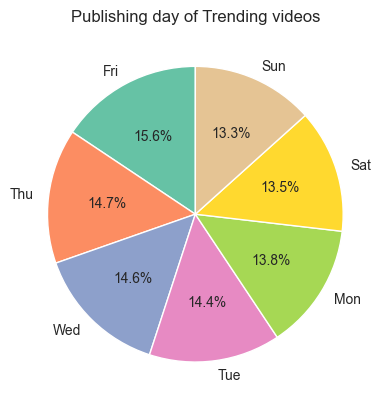

In [216]:
days = df["publishing_day"].value_counts().reset_index(name = "video_count")

#piechart
plt.pie(days["video_count"], labels = days["publishing_day"], autopct = '%1.1f%%', startangle = 90, colors = sns.color_palette("Set2"))
plt.title("Publishing day of Trending videos")
plt.show()

* Most trending videos are published on ```Friday```.

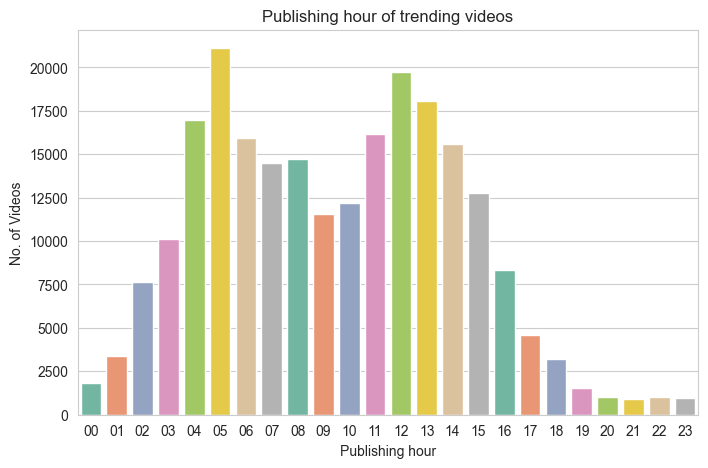

In [221]:
hour = df["publishing_hour"].value_counts().reset_index(name = "video_count")
hour.sort_values(by = 'publishing_hour' , inplace = True)

plt.figure(figsize = (8,5))
sns.barplot(x=hour["publishing_hour"], y=hour["video_count"], data = hour, palette = sns.color_palette("Set2"))
plt.xlabel('Publishing hour')
plt.ylabel('No. of Videos')
plt.title('Publishing hour of trending videos')
plt.show()

* From this graph we can see Most trending videos in India are published between ```4 AM (9:30 AM IST) - 6 AM (11:30 AM IST)``` peaking at ```5 AM (10:30 AM IST)```, and ```11 AM (4:30 PM IST) - 2 PM (7:30 PM IST)``` peaking at ```12 PM (5:30 PM IST)```.

# Conclusions

### From the above analysis on Trending videos on Youtube we have come to the following conclusions :
1. A total of ```233,788``` entries have been collected since 2020, ie, over a period 4 years.
2. ```88%``` of trending videos have less than 5 million views, and ```94%``` have less than 10 million views.
3. ```79%``` of trending videos have less than 150,000 likes and ```89%``` have less than 300,000 likes.
4. ```78%``` of videos have less than 5000 comments and ```87%``` have less than 10,000 comments.
5. Although there are 233788 videos, the unique video count is only ```72895```. This means some videos had been trending for more than one day.
6. There is a positive correlation between likes and view count, that means, increase of views increases the number of likes mostly.
7. Most trending videos have been posted by a channel named ```Vijay Television``` followed by ```Sourav Joshi Vlogs```.
8. Videos from ```Entertainment``` category have been on trending list for most times whereas videos from ```Pets & Animals``` category have been on trend for 110 times.
9. Videos posted on Fridays have been trending for more times.
10. Most trending videos in India are published between ```4 AM (9:30 AM IST) - 6 AM (11:30 AM IST)``` peaking at ```5 AM (10:30 AM IST)```, and ```11 AM (4:30 PM IST) - 2 PM (7:30 PM IST)``` peaking at ```12 PM (5:30 PM IST)```.